### Student Information
Name: 洪偵耀

Student ID: 111033402

GitHub ID: zyao5699

Kaggle name: Ang zhenyao

Kaggle private scoreboard snapshot:

[Snapshot](img/pic0.png)

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home** exercises in the [DM2022-Lab2-master Repo](https://github.com/keziatamus/DM2022-Lab2-Master). You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/competitions/dm2022-isa5810-lab2-homework) regarding Emotion Recognition on Twitter by this link https://www.kaggle.com/t/2b0d14a829f340bc88d2660dc602d4bd. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the 30% available for this section.

    - **Top 41% - 100%**: Get (60-x)/6 + 20 points, where x is your ranking in the leaderboard (ie. If you rank 3rd your score will be (60-3)/6 + 20 = 29.5% out of 30%)   
    Submit your last submission __BEFORE the deadline (Nov. 22th 11:59 pm, Tuesday)_. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**.


Upload your files to your repository then submit the link to it on the corresponding e-learn assignment.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Nov. 25th 11:59 pm, Friday)__. 

In [2]:
### Begin Assignment Here

## Take Home Exercises

[link to Take Home Exercises](./DM2022-Lab2-Master.ipynb)

## Kaggle Competition Report

## 1. Data preparation

To keep things simple here, I process the raw data to test and train dataframe in pickle format on the other notebook. 
[link to Data Preparation](./Data_preparation.ipynb)

### 1.2 Load Data

In [1]:
import pandas as pd

Df_test = pd.read_pickle('df_test.pkl')
Df_train = pd.read_pickle('df_train.pkl')

### 1.3 Exploratory Data Analysis

Text(0, 0.5, 'count')

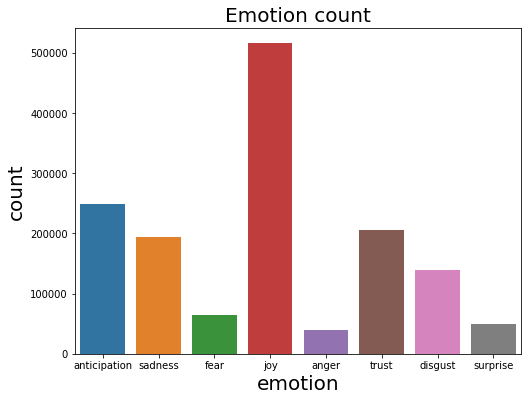

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.subplots(figsize=(8, 6))

g = sns.countplot(Df_train, x = 'emotion')
g.set_title('Emotion count', fontsize=20)
g.set_xlabel('emotion', fontsize=20)
g.set_ylabel('count', fontsize=20)

## 2. Methods

### 2.1 Decision Trees

##### 2.1.1 Decision Trees Process

In [9]:
from sklearn.model_selection import train_test_split

df_train, df_valid = train_test_split(Df_train, test_size=0.2)

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from sklearn.metrics import accuracy_score


# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
BOW_500.fit(df_train['text'])

# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(df_train['text'])
y_train = df_train['emotion']

X_valid = BOW_500.transform(df_valid['text'])
y_valid = df_valid['emotion']

## take a look at data dimension is a good habbit  :)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_valid.shape: ', X_valid.shape)
print('y_valid.shape: ', y_valid.shape)

c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\sklearn\feature_extraction\text.py:524: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


X_train.shape:  (1164450, 500)
y_train.shape:  (1164450,)
X_valid.shape:  (291113, 500)
y_valid.shape:  (291113,)


In [11]:
## build DecisionTree model
DT_model = DecisionTreeClassifier(random_state=42)

## training!
DT_model = DT_model.fit(X_train, y_train)

## predict!
y_train_pred = DT_model.predict(X_train)
y_valid_pred = DT_model.predict(X_valid)

## so we get the pred result
y_train_pred[:10]
y_valid_pred[:10]

array(['anticipation', 'anticipation', 'joy', 'sadness', 'trust',
       'disgust', 'anticipation', 'anticipation', 'joy', 'joy'],
      dtype=object)

In [12]:
acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_valid = accuracy_score(y_true=y_valid, y_pred=y_valid_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('validation accuracy: {}'.format(round(acc_valid, 2)))

training accuracy: 0.97
validation accuracy: 0.41


##### 2.1.2 Decision Trees Results

In [13]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_valid, y_pred=y_valid_pred))

              precision    recall  f1-score   support

       anger       0.17      0.14      0.15      7883
anticipation       0.44      0.45      0.44     49745
     disgust       0.25      0.25      0.25     27896
        fear       0.20      0.19      0.19     12869
         joy       0.53      0.56      0.54    103064
     sadness       0.35      0.33      0.34     38740
    surprise       0.23      0.18      0.20      9848
       trust       0.32      0.30      0.31     41068

    accuracy                           0.41    291113
   macro avg       0.31      0.30      0.30    291113
weighted avg       0.40      0.41      0.40    291113



#### 2.1.3 Predict Test Case with Decision Tree

In [75]:
# Predict test case
X_test = BOW_500.transform(df_test['text'])
y_test_pred = DT_model.predict(X_test)

In [116]:
# Output predict result
result_emo = pd.DataFrame(y_test_pred, columns=['emotion'])
result_DT = pd.merge(df_test['tweet_id'], result_emo, left_index=True, right_index=True)
result_DT.to_csv('result_DT.csv', index = False)

### 2.2 Naive Bayes

##### 2.2.1 Naive Bayes Process

In [3]:
import nltk
from nltk.corpus import stopwords
# nltk.download('stopwords')
stop = stopwords.words('english')
Df_train['text_new'] = Df_train['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [4]:
from sklearn.model_selection import train_test_split

df_train, df_valid = train_test_split(Df_train, test_size=0.2)

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
# TF-IDF features
TFIDF_1000 = TfidfVectorizer(smooth_idf=True, tokenizer=nltk.word_tokenize, max_features=1000)
TFIDF_1000.fit(df_train['text_new'])

c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\sklearn\feature_extraction\text.py:524: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


TfidfVectorizer(max_features=1000,
                tokenizer=<function word_tokenize at 0x000001A3E0F490D0>)

##### 2.2.2 Naive Bayes Results

In [47]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
# Use the TF-IDF features to build the Gaussian Naive Bayes classifier.
X_train_tfidf = TFIDF_1000.transform(df_train['text_new'])
X_valid_tfidf = TFIDF_1000.transform(df_valid['text_new'])

y_train = df_train['emotion']
y_valid = df_valid['emotion']

MNB_tfidf = MultinomialNB()
MNB_tfidf.fit(X_train_tfidf, y_train)

tfidf_pred_train = MNB_tfidf.predict(X_train_tfidf)
tfidf_pred_valid  = MNB_tfidf.predict(X_valid_tfidf)

tfidf_acc_train = accuracy_score(y_true=y_train, y_pred=tfidf_pred_train)
tfidf_acc_valid  = accuracy_score(y_true=y_valid,  y_pred=tfidf_pred_valid)

print('(TFIDF 1000)training accuracy: {}'.format(round(tfidf_acc_train, 2)))
print('(TFIDF 1000)validing  accuracy: {}'.format(round(tfidf_acc_valid, 2)))
print(classification_report(y_true=y_valid, y_pred=tfidf_pred_valid))

(TFIDF 1000)training accuracy: 0.46
(TFIDF 1000)validing  accuracy: 0.46
              precision    recall  f1-score   support

       anger       0.83      0.04      0.07      7973
anticipation       0.60      0.35      0.44     50033
     disgust       0.52      0.15      0.23     27719
        fear       0.85      0.17      0.28     12823
         joy       0.43      0.91      0.58    103273
     sadness       0.50      0.32      0.39     38619
    surprise       0.81      0.08      0.14      9663
       trust       0.69      0.08      0.14     41010

    accuracy                           0.46    291113
   macro avg       0.65      0.26      0.28    291113
weighted avg       0.55      0.46      0.39    291113



#### 2.2.3 Predict Test Case with Naive Bayes

In [120]:
df_test['text_new'] = df_test['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
X_test_tfid = TFIDF_1000.transform(df_test['text_new'])

In [121]:
y_test_pred_tfidf = MNB_tfidf.predict(X_test_tfid)

In [122]:
# result to csv
result_emo_tfidf = pd.DataFrame(y_test_pred_tfidf, columns=['emotion'])
result_NB = pd.merge(df_test['tweet_id'], result_emo_tfidf, left_index=True, right_index=True)
result_NB.to_csv('result_NB.csv', index = False)

### 2.3 MLP

##### 2.3.1 MLP Process

In [6]:
from sklearn.model_selection import train_test_split

X_train = TFIDF_1000.transform(df_train['text_new']).toarray()
X_valid = TFIDF_1000.transform(df_valid['text_new']).toarray()

In [7]:
y_train = df_train['emotion']
y_valid = df_valid['emotion']

In [8]:
## deal with label (string -> one-hot)
import numpy as np
import keras
from keras import utils as np_utils
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train)
print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_valid.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.np_utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train)
y_valid = label_encode(label_encoder, y_valid)

print('\n\n## After convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_valid.shape)

check label:  ['anger' 'anticipation' 'disgust' 'fear' 'joy' 'sadness' 'surprise'
 'trust']

## Before convert
y_train[0:4]:
 22274          joy
283259     disgust
932948    surprise
846229       trust
Name: emotion, dtype: object

y_train.shape:  (1164450,)
y_test.shape:  (291113,)


## After convert
y_train[0:4]:
 [[0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]]

y_train.shape:  (1164450, 8)
y_test.shape:  (291113, 8)


In [9]:
# I/O check
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  1000
output_shape:  8


In [11]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=128)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=128)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 64
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1000)]            0         
                                                                 
 dense_3 (Dense)             (None, 128)               128128    
                                                                 
 re_lu_2 (ReLU)              (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 re_lu_3 (ReLU)              (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 8)                 1032      
                                                                 
 softmax_1 (Softmax)         (None, 8)                 0   

In [12]:
X_train.shape

(1164450, 1000)

In [13]:
y_train.shape

(1164450, 8)

In [14]:
from keras.callbacks import CSVLogger

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    validation_data = (X_valid, y_valid))
print('training finish')

Epoch 1/25
36390/36390 [==============================] - 115s 3ms/step - loss: 1.3735 - accuracy: 0.4994 - val_loss: 1.3367 - val_accuracy: 0.5133
Epoch 2/25
36390/36390 [==============================] - 96s 3ms/step - loss: 1.3173 - accuracy: 0.5192 - val_loss: 1.3253 - val_accuracy: 0.5162
Epoch 3/25
36390/36390 [==============================] - 89s 2ms/step - loss: 1.2967 - accuracy: 0.5270 - val_loss: 1.3239 - val_accuracy: 0.5182
Epoch 4/25
36390/36390 [==============================] - 93s 3ms/step - loss: 1.2830 - accuracy: 0.5322 - val_loss: 1.3230 - val_accuracy: 0.5181
Epoch 5/25
36390/36390 [==============================] - 90s 2ms/step - loss: 1.2723 - accuracy: 0.5364 - val_loss: 1.3281 - val_accuracy: 0.5175
Epoch 6/25
36390/36390 [==============================] - 91s 2ms/step - loss: 1.2640 - accuracy: 0.5393 - val_loss: 1.3297 - val_accuracy: 0.5175
Epoch 7/25
36390/36390 [==============================] - 96s 3ms/step - loss: 1.2567 - accuracy: 0.5423 - val_loss: 

KeyboardInterrupt: 

In [15]:
## predict
pred_result = model.predict(X_valid, batch_size=128)
pred_result[:5]

2275/2275 [==============================] - 6s 2ms/step


array([[2.9930227e-02, 4.2369220e-02, 8.5930489e-02, 4.2503133e-02,
        4.4148603e-01, 1.0572041e-01, 4.0859357e-02, 2.1120113e-01],
       [1.8053653e-07, 1.5693680e-05, 2.5438665e-05, 1.0720383e-05,
        5.3077742e-06, 9.9992323e-01, 7.0312393e-07, 1.8673532e-05],
       [1.5602185e-02, 2.9736963e-01, 2.8405814e-02, 9.4003435e-03,
        4.3204337e-01, 2.2762375e-02, 1.8730050e-02, 1.7568617e-01],
       [6.2085819e-05, 1.6024540e-04, 2.0980171e-03, 9.9064052e-01,
        2.0830524e-03, 4.3119639e-03, 2.5887997e-04, 3.8518524e-04],
       [2.4337919e-02, 9.2997529e-02, 2.3808530e-01, 4.4852857e-02,
        1.6500399e-01, 1.7991111e-01, 5.2444957e-02, 2.0236638e-01]],
      dtype=float32)

In [16]:
pred_result = label_decode(label_encoder, pred_result)
pred_result[:5]

array(['joy', 'sadness', 'joy', 'fear', 'disgust'], dtype=object)

In [18]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [19]:
print('validation accuracy: {}'.format(round(accuracy_score(label_decode(label_encoder, y_valid), pred_result), 2)))

validation accuracy: 0.51


##### 2.3.2 MLP Results

In [20]:
print(classification_report(label_decode(label_encoder, y_valid), pred_result))

              precision    recall  f1-score   support

       anger       0.43      0.14      0.21      7777
anticipation       0.58      0.50      0.54     49838
     disgust       0.40      0.27      0.32     28068
        fear       0.55      0.32      0.40     12879
         joy       0.53      0.78      0.63    103151
     sadness       0.43      0.45      0.44     38624
    surprise       0.72      0.15      0.25      9787
       trust       0.50      0.29      0.37     40989

    accuracy                           0.51    291113
   macro avg       0.52      0.36      0.39    291113
weighted avg       0.51      0.51      0.49    291113



In [21]:
model.save('MLP')

INFO:tensorflow:Assets written to: MLP\assets


#### 2.3.3 predict test case with MLP

In [23]:
Df_test['text_new'] = Df_test['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
X_test_tfid = TFIDF_1000.transform(Df_test['text_new']).toarray()

In [25]:
## predict
X_test_tfid = X_test_tfid.toarray()
pred_result = model.predict(X_test_tfid, batch_size=128)

pred_result = label_decode(label_encoder, pred_result)
pred_result[:5]

3219/3219 [==============================] - 8s 2ms/step


array(['joy', 'trust', 'sadness', 'joy', 'anticipation'], dtype=object)

In [27]:
# Output predict result
pred_result = pd.DataFrame(pred_result, columns=['emotion'])
result_MLP = pd.merge(Df_test['tweet_id'], pred_result, left_index=True, right_index=True)
result_MLP.to_csv('result_MLP.csv', index = False)

### 2.4 Bert

The code runs on Kaggle, below is the link to the notebook.
[link to Bert](./Bert.ipynb)

## 3. Report

I have tried those methods which had been teached in Lab2, such as Decision Trees, Naive Bayes and MLP. I also try to use the Bert model which suggested in class for text mining, it also created the best result against other methods.

##### Decision Trees
- In feature engineering, I use `CountVectorizer` and `nltk tokenizer` to build the BOW (Bag-Of-Words) analyzers with `max_features=500`.
- From traning result, it obtains a high 0.97 training accuracy, but only 0.41 on validation accuracy. It may caused by overfitting.
- The F1-score from the public leaderboard of Decision Trees is 0.2913

##### Naive Bayes
- In feature engineering, I used `TfidfVectorizer` with `nltk tokenizer` to build the TF-IDF analyzer with `max_features=1000`, I also tried to remove the stopwords from the tokenized data before the TF-IDF analyzer. 
- I have used the Multinomial Naive Bayes model which is better for NLP against other Naive Bayes methods.
- From traning result, it obtains 0.46 on both validation and traning accuracy, which is better than Decision Trees.
- The F1-score from the public leaderboard of Naive Bayes is 0.38357

##### MLP
- At first, I used the BOW500 analyzer to tokenize the text input. I also used the same architecture from Lab2. However, in just few steps of training, the model quickly became overfitting, the training accuracy is about 0.9 where the validation accuracy is only 0.2. After I terminated the training, I found that a lot of predictions of the validation data are joy, thus I had increase the unit size of the hidden layers to 128 and replace the tokenizer to TF-IDF with `max_features=1000`.
- I terminated the training at the 13th epoch before the model became overfitting.
- From traning result, it obtains a 0.55 training accuracy and 0.51 on validation accuracy which is quite good.
- The result from the public leaderboard also shows the better performance of MLP where the F1-score is 0.41732.

##### Bert
- I choose Bert to handle this task due its outstanding performance in text mining and NLP.
- For the data preprocessing and feature engineering, I used the pre-trained BERT tokenizer and the `batch_encode_plus` for text encoding.
- For the pre-trained Bert model, I used the "bert-base-uncased" model and "AdamW" as the optimizer.
- At first, the model cannot run successfully even in kaggle due to Out of Memory issues of GPU, I reduced the batch size to 64 to resolved the problem.
- From training result, it obtains the best validation accuracy, which is 0.6391
- The Bert model F1-score is 0.54694, which is so far the best score I have obtained.

##### Conclusion
My final position on the Kaggle leaderboard is 13th, and the model I used is the Bert. I thinks that the no free lunch theorem is quite good for explaining the results of each model I used. The computational cost of the Bert is huge. When tunning the pre_trained Bert model for only 4 ephochs on Kaggle, however, it used out all the computation power of a Tesla P100 for about 12 hours to complete the task. On the other hands, the MLP model can even runs on my laptop GPU and obtains the result in about 20 minutes, where the Naive Bayes and Decision Trees even only takes few minutes to train with CPU. Although Bert is time consuming, but it is absolutely worth for the result.